In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMClassifier
from sklearn import metrics

In [6]:
df = pd.read_csv('./heart.csv')

In [7]:
# check for missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
sum(df.HeartDisease)/len(df.HeartDisease)

0.5533769063180828

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Label Encoding

In [12]:
d = df
d["ChestPainType"] = d["ChestPainType"].astype('category')
d["ChestPainType_cat"] = d["ChestPainType"].cat.codes
d["RestingECG"] = d["RestingECG"].astype('category')
d["RestingECG_cat"] = d["RestingECG"].cat.codes
d["ExerciseAngina"] = d["ExerciseAngina"].astype('category')
d["ExerciseAngina_cat"] = d["ExerciseAngina"].cat.codes
d["ST_Slope"] = d["ST_Slope"].astype('category')
d["ST_Slope_cat"] = d["ST_Slope"].cat.codes
d["Sex"] = d["Sex"].astype('category')
d["Sex_cat"] = d["Sex"].cat.codes
d = d.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis='columns')

d.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_cat,RestingECG_cat,ExerciseAngina_cat,ST_Slope_cat,Sex_cat
0,40,140,289,0,172,0.0,0,1,1,0,2,1
1,49,160,180,0,156,1.0,1,2,1,0,1,0
2,37,130,283,0,98,0.0,0,1,2,0,2,1
3,48,138,214,0,108,1.5,1,0,1,1,1,0
4,54,150,195,0,122,0.0,0,2,1,0,2,1


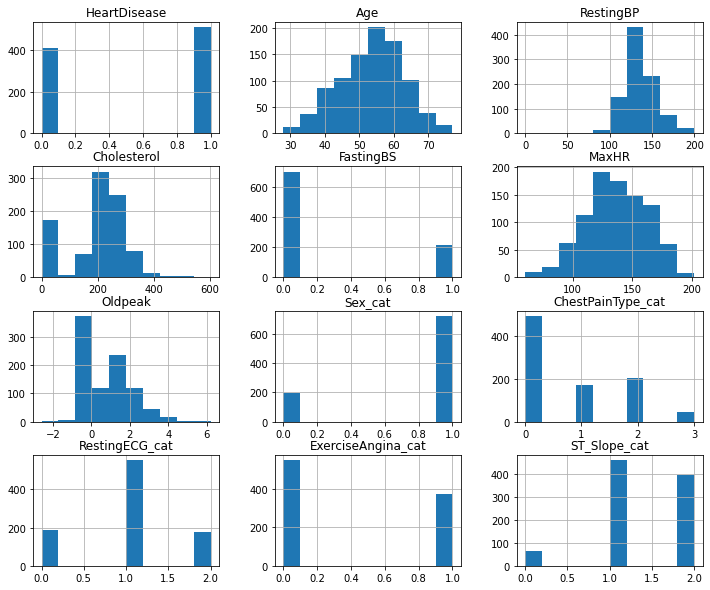

In [13]:
d[['HeartDisease','Age','RestingBP','Cholesterol','FastingBS','MaxHR',
   'Oldpeak','Sex_cat','ChestPainType_cat','RestingECG_cat','ExerciseAngina_cat','ST_Slope_cat']].hist(figsize=(12,10))
plt.show()

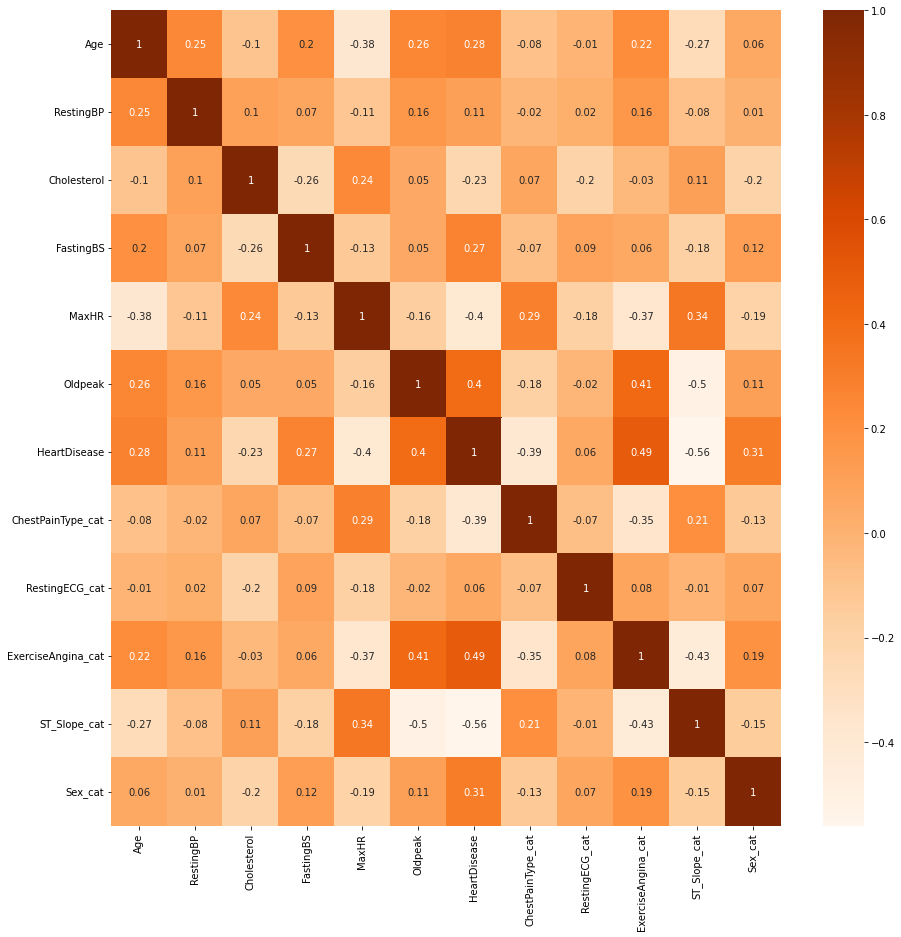

In [14]:
plt.figure(figsize = (15,15))
sns.heatmap(round(d.corr(),2), cmap='Oranges', annot=True)
plt.show()

In [15]:
y = d.HeartDisease
x = d.drop(['HeartDisease'], axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 99)

In [18]:
from sklearn.model_selection import GridSearchCV

learning_rate = [0.05,0.07,0.1,0.2,0.3]
feature_fraction = [0.5,0.6,0.7,0.8,0.9]
num_leaves = [4,6,8,12,16]
max_depth = [3,5,7,9,11]
lambda_l2 = [0.01,0.03,0.05,0.07,0.09]
parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth,
              'lambda_l2':lambda_l2,
              'is_unbalance': [True]}
model = LGBMClassifier(n_estimators = 50)

# Conduct GridSearch with cross vaildation
clf = GridSearchCV(model, parameters, cv=3, scoring='f1',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)
clf.best_params_

Fitting 3 folds for each of 3125 candidates, totalling 9375 fits


{'feature_fraction': 0.8,
 'is_unbalance': True,
 'lambda_l2': 0.03,
 'learning_rate': 0.1,
 'max_depth': 5,
 'num_leaves': 8}

The training accuracy of the LightGBM is: 0.9536784741144414
The training F1 Score of the LightGBM is: 0.9593301435406698
The training ROC-AUC Score of the LightGBM is: 0.9514870169082125
The training Precision Score of the LightGBM is: 0.9502369668246445
The training Recall Score of the LightGBM is: 0.9685990338164251


The test accuracy of the LightGBM is: 0.875
The test F1 Score of the LightGBM is: 0.8808290155440415
The test ROC-AUC Score of the LightGBM is: 0.8743498817966903
The test Precision Score of the LightGBM is: 0.8585858585858586
The test Recall Score of the LightGBM is: 0.9042553191489362


The confusion matrix result:
 [[76  9]
 [14 85]]


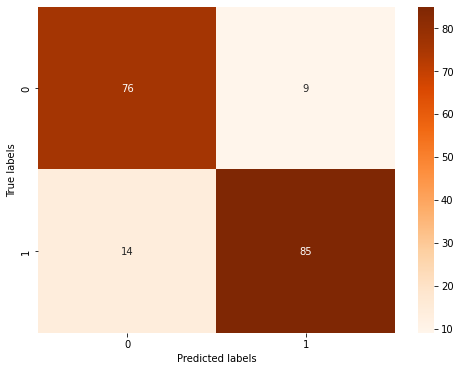

In [21]:
clf = LGBMClassifier(feature_fraction = 0.8,
                    learning_rate = 0.1,
                    max_depth= 5,
                    num_leaves = 8,
                    lambda_l2= 0.03,
                     )
# fit the model
clf.fit(x_train, y_train)
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

# check the model performance
print('The training accuracy of the LightGBM is:',metrics.accuracy_score(y_train,train_predict))
print('The training F1 Score of the LightGBM is:',metrics.f1_score(y_train,train_predict))
print('The training ROC-AUC Score of the LightGBM is:',metrics.roc_auc_score(y_train,train_predict))
print('The training Precision Score of the LightGBM is:',metrics.precision_score(y_train,train_predict))
print('The training Recall Score of the LightGBM is:',metrics.recall_score(y_train,train_predict))
print('\n')
print('The test accuracy of the LightGBM is:',metrics.accuracy_score(y_test,test_predict))
print('The test F1 Score of the LightGBM is:',metrics.f1_score(y_test,test_predict))
print('The test ROC-AUC Score of the LightGBM is:',metrics.roc_auc_score(y_test,test_predict))
print('The test Precision Score of the LightGBM is:',metrics.precision_score(y_test,test_predict))
print('The test Recall Score of the LightGBM is:',metrics.recall_score(y_test,test_predict))
print('\n')

# confusion_matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# visiulzation the prediction result with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Oranges')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

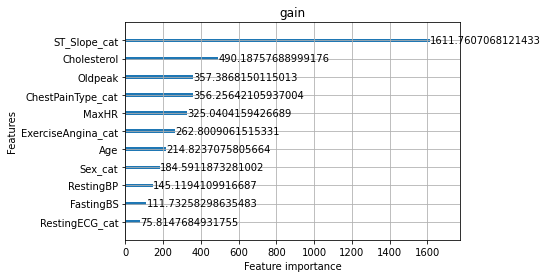

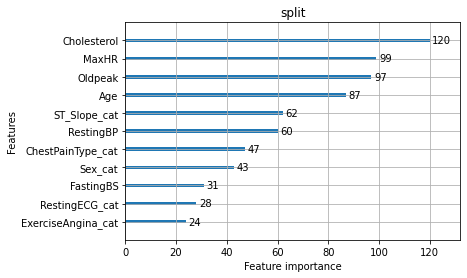

In [22]:
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance

ax1=plot_importance(clf,importance_type="gain")
ax1.set_title('gain')
ax2=plot_importance(clf, importance_type="split")
ax2.set_title('split')
plt.show()

One-Hot Encoding

In [ ]:
df = pd.read_csv('./heart.csv')
y = df.HeartDisease
x = df.drop(['HeartDisease'], axis=1)

In [ ]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
Sex = pd.get_dummies(pd.DataFrame(df,columns=['Sex']))
Sex.describe()

,Sex_F,Sex_M
count,918.000000,918.000000
mean,0.210240,0.789760
std,0.407701,0.407701
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
ChestPainType = pd.get_dummies(pd.DataFrame(df,columns=['ChestPainType']))
ChestPainType.describe()

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
count,918.000000,918.000000,918.000000,918.000000
mean,0.540305,0.188453,0.221133,0.050109
std,0.498645,0.391287,0.415236,0.218289
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
RestingECG = pd.get_dummies(pd.DataFrame(df,columns=['RestingECG']))
RestingECG.describe()

,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
count,918.000000,918.000000,918.000000
mean,0.204793,0.601307,0.193900
std,0.403770,0.489896,0.395567
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
ExerciseAngina = pd.get_dummies(pd.DataFrame(df,columns=['ExerciseAngina']))
ExerciseAngina.describe()

,ExerciseAngina_N,ExerciseAngina_Y
count,918.000000,918.000000
mean,0.595861,0.404139
std,0.490992,0.490992
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
ST_Slope = pd.get_dummies(pd.DataFrame(df,columns=['ST_Slope']))
ST_Slope.describe()

,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000
mean,0.068627,0.501089,0.430283
std,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
merged = pd.concat([x,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope],axis='columns')
new_x = merged.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis='columns')
#new_x = merged.drop(['gender','ever_married','work_type','Residence_type','smoking_status','bmi_random'],axis='columns')
#new_x = merged.drop(['gender','ever_married','work_type','Residence_type','smoking_status','bmi'],axis='columns') 
new_x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, shuffle = True, test_size = 0.2, random_state = 99)

In [ ]:
from sklearn.model_selection import GridSearchCV

learning_rate = [0.05,0.07,0.1,0.2,0.3]
feature_fraction = [0.5,0.6,0.7,0.8,0.9]
num_leaves = [4,6,8,12,16]
max_depth = [3,5,7,9,11]
lambda_l2 = [0.01,0.03,0.05,0.07,0.09]
parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth,
              'lambda_l2':lambda_l2,
              'is_unbalance': [True]}
model = LGBMClassifier(n_estimators = 50)

## conduct grid search via cross vaildation
clf = GridSearchCV(model, parameters, cv=3, scoring='f1',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)
clf.best_params_

Fitting 3 folds for each of 3125 candidates, totalling 9375 fits


{'feature_fraction': 0.5,
 'is_unbalance': True,
 'lambda_l2': 0.07,
 'learning_rate': 0.1,
 'max_depth': 3,
 'num_leaves': 8}

The training accuracy of the LightGBM is: 0.9305177111716622
The training F1 Score of the LightGBM is: 0.9392133492252682
The training ROC-AUC Score of the LightGBM is: 0.9274079106280193
The training Precision Score of the LightGBM is: 0.9270588235294117
The training Recall Score of the LightGBM is: 0.9516908212560387


The test accuracy of the LightGBM is: 0.8695652173913043
The test F1 Score of the LightGBM is: 0.8762886597938143
The test ROC-AUC Score of the LightGBM is: 0.8687943262411348
The test Precision Score of the LightGBM is: 0.85
The test Recall Score of the LightGBM is: 0.9042553191489362


The confusion matrix result:
 [[75  9]
 [15 85]]


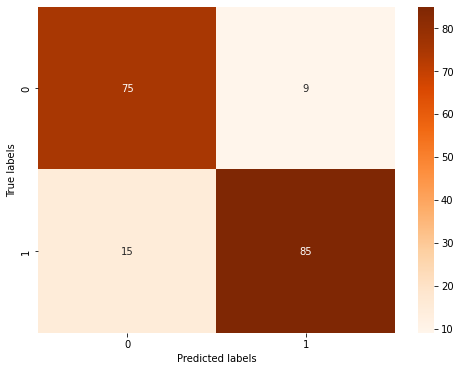

In [ ]:
clf_ = LGBMClassifier(feature_fraction = 0.5,
                    learning_rate = 0.1,
                    max_depth= 3,
                    num_leaves = 8,
                    lambda_l2= 0.07,
                     )
# fit the model
clf_.fit(x_train, y_train)
train_predict = clf_.predict(x_train)
test_predict = clf_.predict(x_test)

# check the model performance
print('The training accuracy of the LightGBM is:',metrics.accuracy_score(y_train,train_predict))
print('The training F1 Score of the LightGBM is:',metrics.f1_score(y_train,train_predict))
print('The training ROC-AUC Score of the LightGBM is:',metrics.roc_auc_score(y_train,train_predict))
print('The training Precision Score of the LightGBM is:',metrics.precision_score(y_train,train_predict))
print('The training Recall Score of the LightGBM is:',metrics.recall_score(y_train,train_predict))
print('\n')
print('The test accuracy of the LightGBM is:',metrics.accuracy_score(y_test,test_predict))
print('The test F1 Score of the LightGBM is:',metrics.f1_score(y_test,test_predict))
print('The test ROC-AUC Score of the LightGBM is:',metrics.roc_auc_score(y_test,test_predict))
print('The test Precision Score of the LightGBM is:',metrics.precision_score(y_test,test_predict))
print('The test Recall Score of the LightGBM is:',metrics.recall_score(y_test,test_predict))
print('\n')

# confusion_matrix
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# visiulzation the prediction result with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Oranges')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

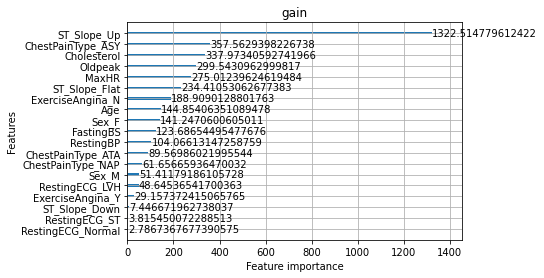

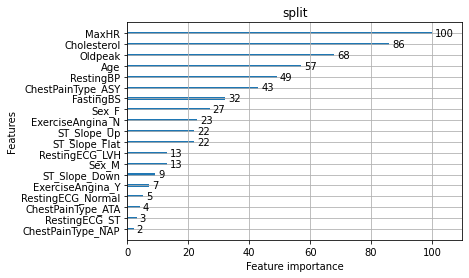

In [ ]:
ax1=plot_importance(clf_,importance_type="gain")
ax1.set_title('gain')
ax2=plot_importance(clf_, importance_type="split")
ax2.set_title('split')
plt.show()